<h1><center>HR Retention Analysis</center></h1>

This analysis was conducted on an HR attrition dataset. Many employers today are taking great strides in order to identify what factors are the most important to employees. This analysis aims to take in a number of those factors and identify which ones are the most important. It does this by analyzing the attrition variable across the rest of the features in the dataset. Does job satisfaction matter more than total pay? What are the most important predictor of whether or not an employee leaves the job? Can a model be developed from the dataset to predict whether or not employees will remain in the job? What are some of the limitations of the analysis? Some of these questions are crucial areas to be identified by employers in order retain talent which can positively affect their ability to deliver value to their customers.


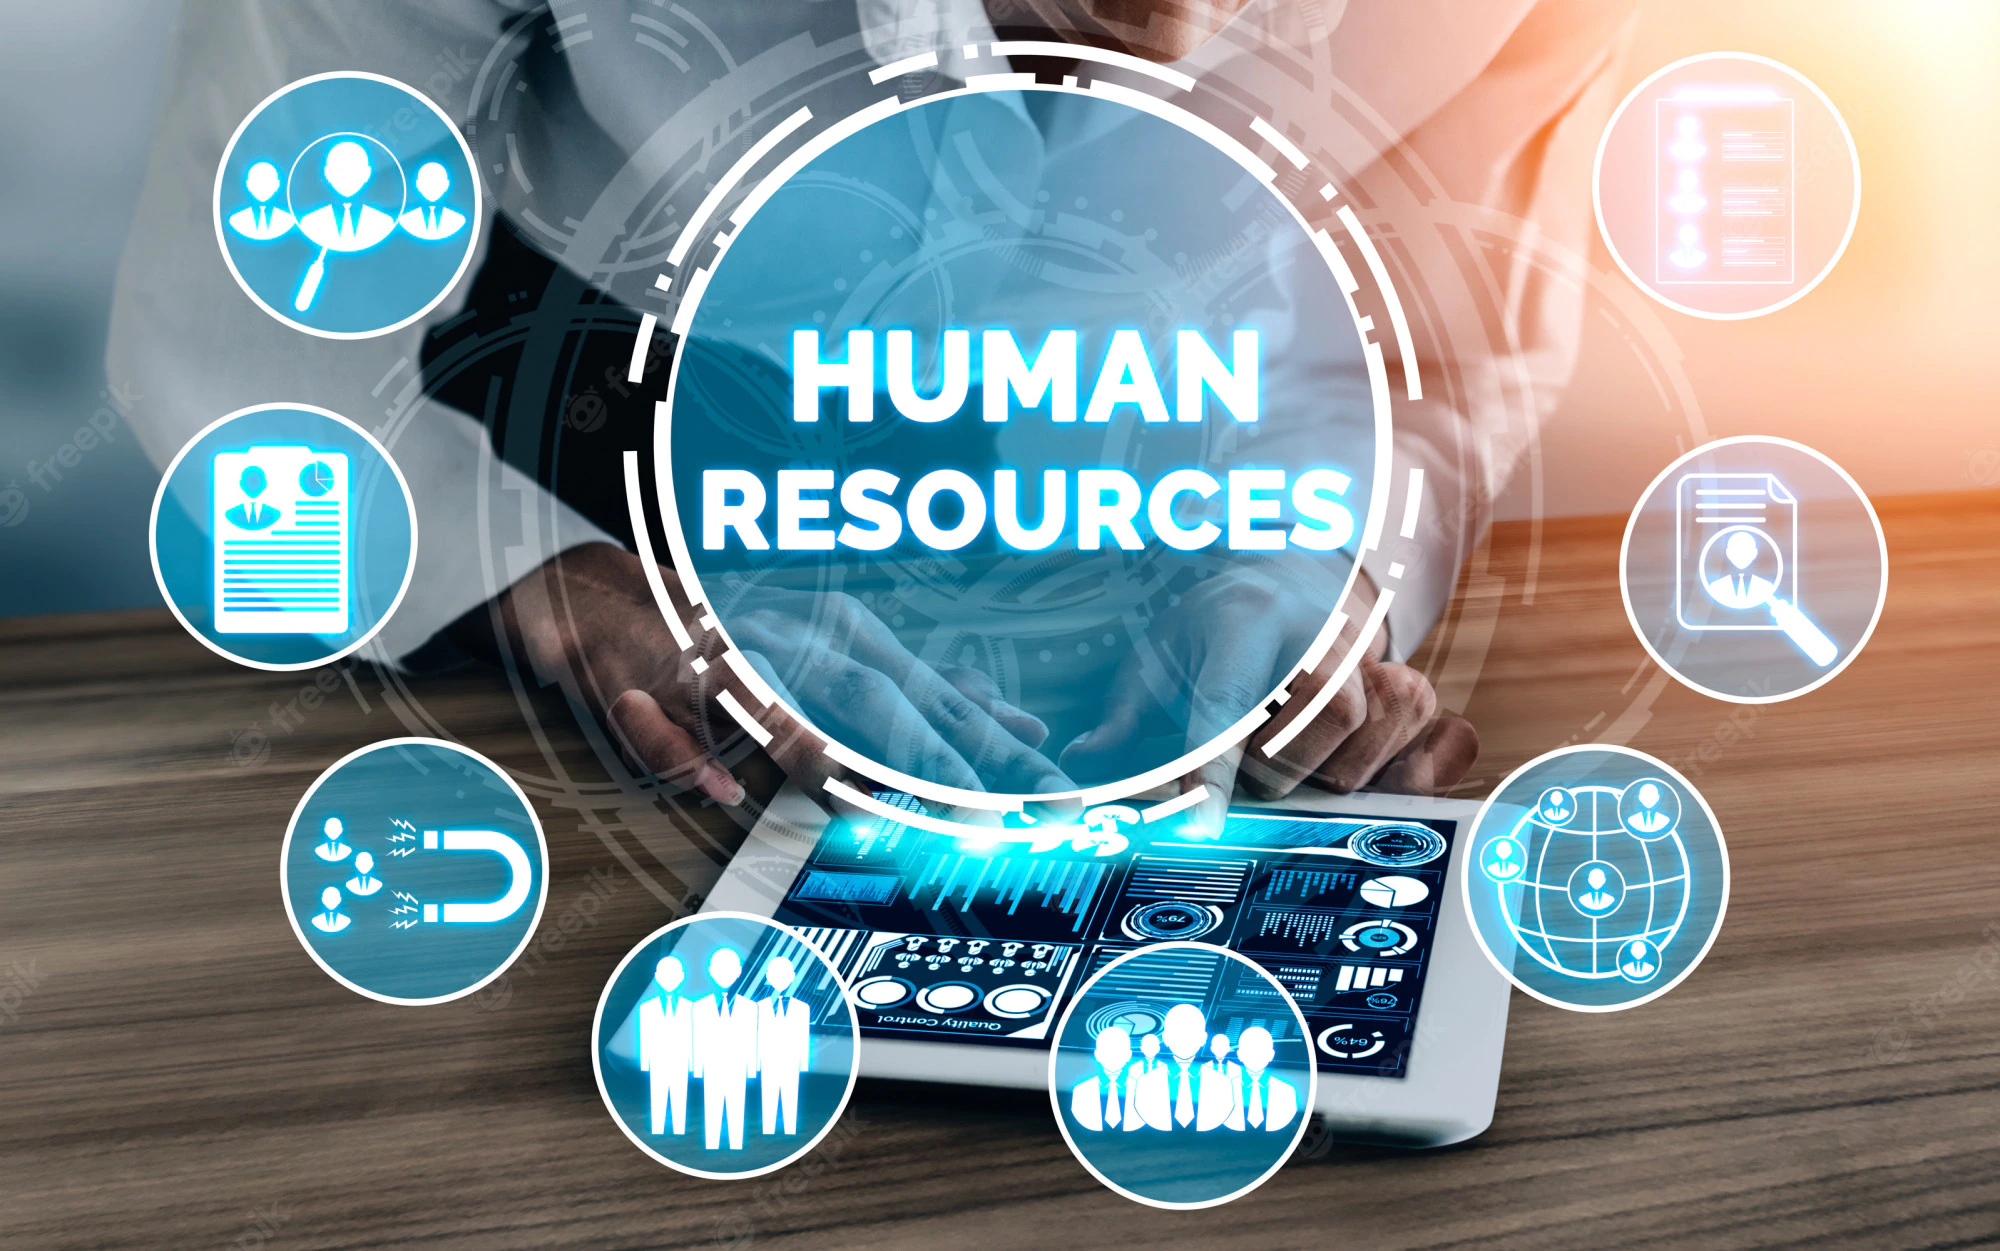


In [126]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_score, roc_curve, recall_score, f1_score, roc_auc_score, accuracy_score
from imblearn.ensemble import RUSBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
print('The libraries are loaded')

The libraries are loaded


## Importing/Examining the Data

In [127]:
# Read dataset into pd df
hr = pd.read_csv('attrition.csv')

In [128]:
# Examine data
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [129]:
# Examine data type, columns,  and counts of non-nulls
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [130]:
# Look at distributions of all variables
hr.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


There doesn't appear to be any extreme outliers this dataset and each category looks to be normally distributed

In [131]:
# Dropping columns that will not by useful to the analysis
hr.drop(['EmployeeCount', 'EmployeeNumber','StandardHours','Over18','OverTime'], axis=1, 
        inplace=True)

In [132]:
# Checking shape shape of data
hr.shape

(1470, 30)

In [133]:
# Validating that there are not any NaN
hr.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

There are no null values in this dataset.

## Exploratory Data Analysis

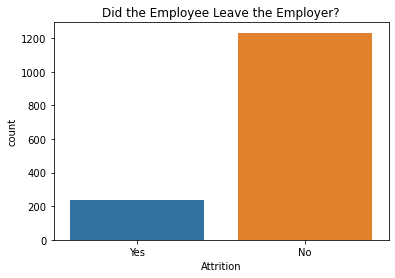

In [134]:
# Examining depedent or predictor variable
sns.countplot(x='Attrition',data=hr)
plt.title('Did the Employee Leave the Employer?')
plt.show()

Important to note that the dependent variable is unbalanced. This can cause issues with models as many have problems predicting minority classes.

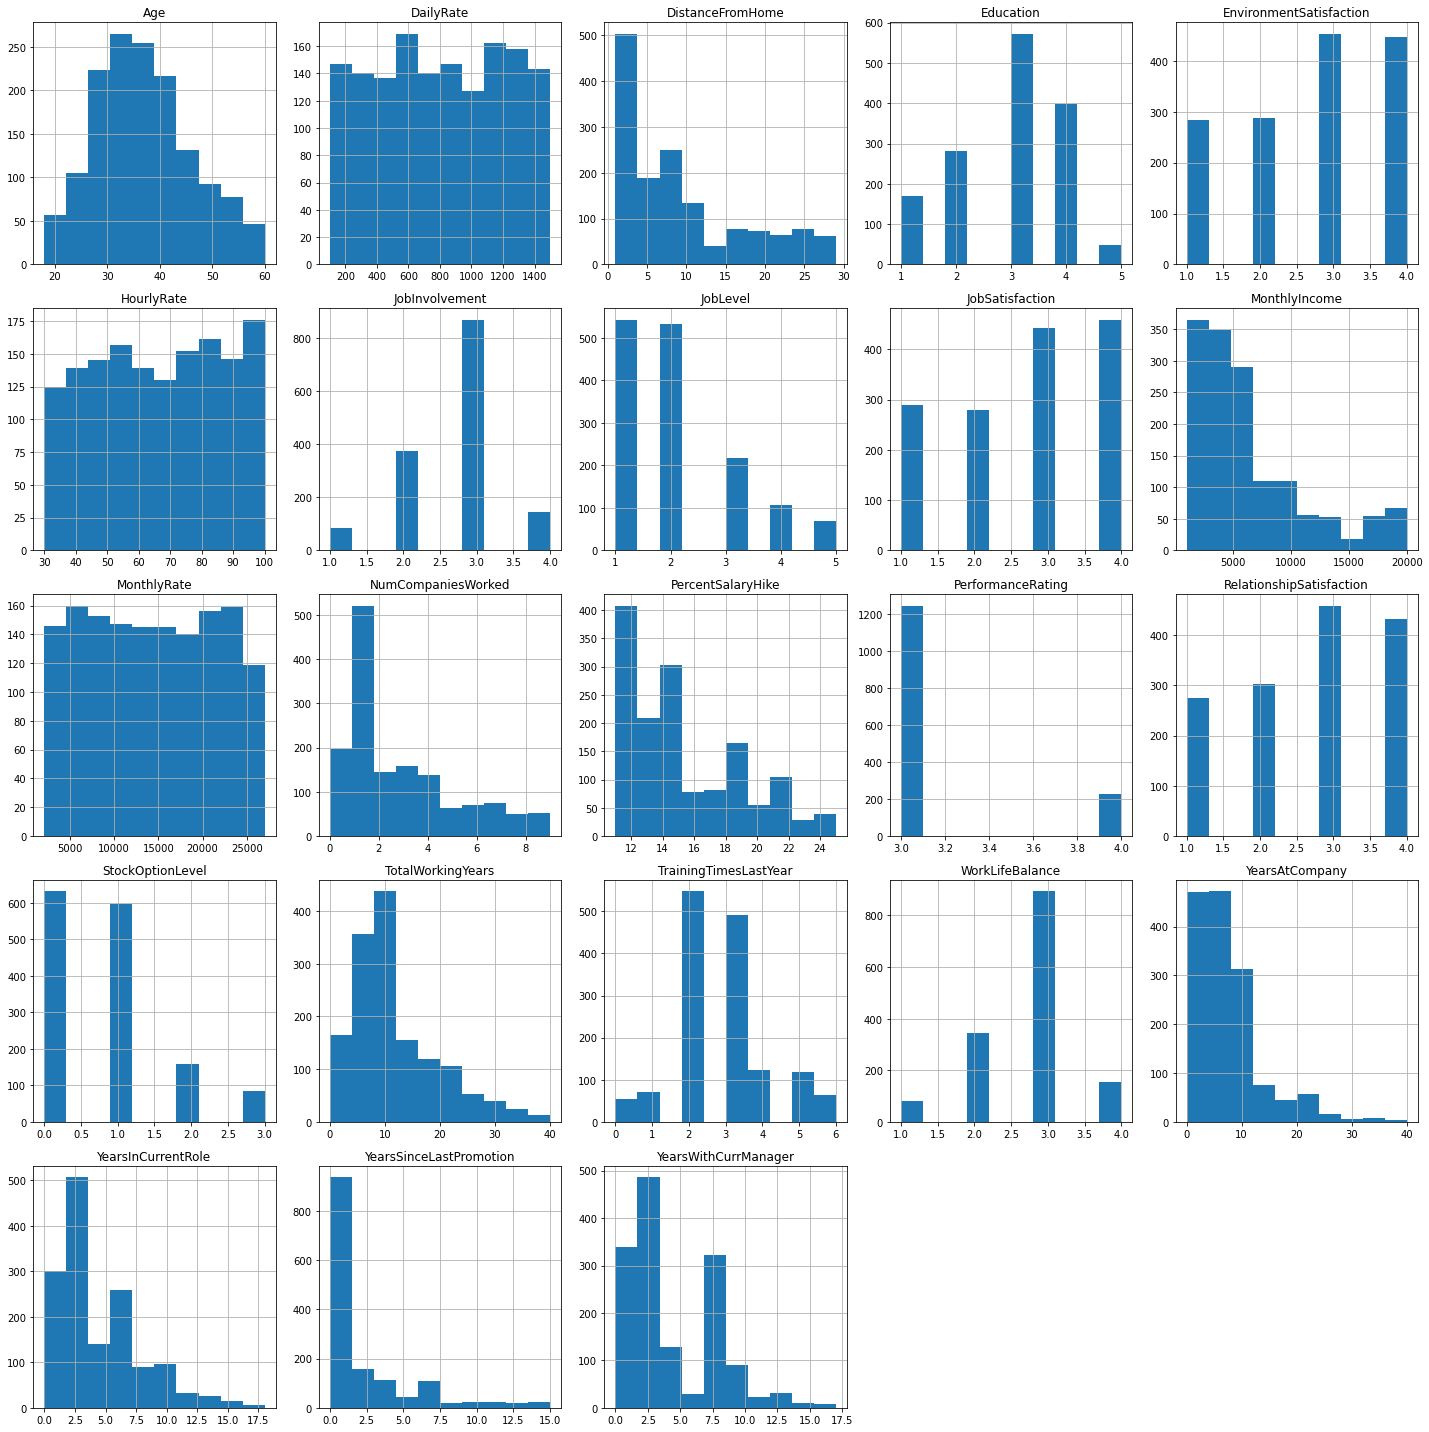

In [135]:
# Examine distributions of each variable
hr.hist(figsize=(20,20))
plt.tight_layout()

This can give good ideas of the distributions of the data for each of these numerical features. For example, the age variable looks to be a little skewed to the right. Most of the staff is 25-45 years old. Let's examine the age variable a little closer.

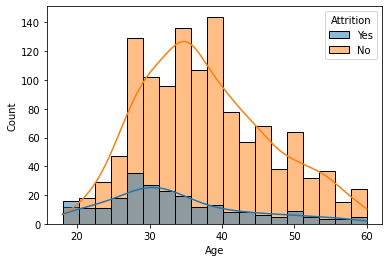

In [136]:
# Plotting age against attrition
sns.histplot(hr, x="Age",hue="Attrition", kde=True)
plt.show()

It appears that the highest counts of employees leaving occurs when their age is between 25-30. 

Next, let's take a look at correlations...

In [137]:
# Creating list of number variables for heatmap
num_var = ['Age', 'DailyRate', 'DistanceFromHome',
           'HourlyRate', 'JobInvolvement',
           'MonthlyIncome','MonthlyRate', 'NumCompaniesWorked',
           'PercentSalaryHike','RelationshipSatisfaction',
           'TotalWorkingYears','TrainingTimesLastYear',
           'YearsAtCompany','YearsInCurrentRole',
           'YearsSinceLastPromotion','YearsWithCurrManager']

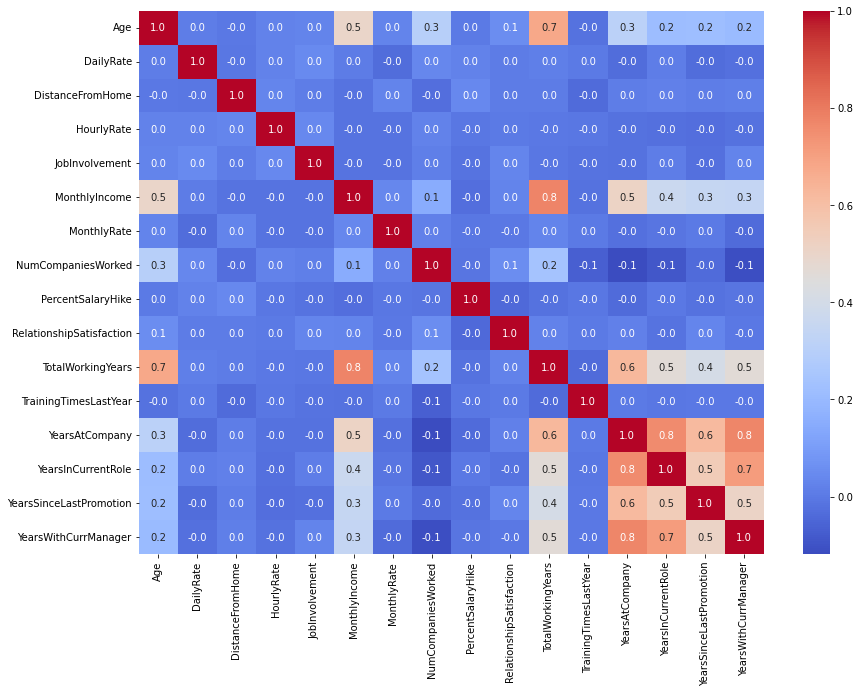

In [138]:
# Heatmap visualization
corr = hr[num_var].corr()

# plot the heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

Overall, most of the features are not closely correlated with one another. It is important to attempt to not include features in the model that are closely correlated. The features that are closely related (as suspected) are the the JobLevel, MonthlyIncome, TotalWorkingYears, YearsWithCurrManager, and YearsAtCompany. Generally speaking, as one of these values increase, the others will increase (positive correlation).


Next, let's take a look at the categorical features

In [139]:
# Grouping all categorical variables
cat_var = ['BusinessTravel', 'Department', 'Education', 'EducationField', 
           'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 
           'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 
           'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
           'WorkLifeBalance']

In [140]:
# Print value counts for cat_var
for i in cat_var:
    print('Value Counts for',i)
    print(hr[i].value_counts())
    print("\n")

Value Counts for BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Value Counts for Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Value Counts for Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


Value Counts for EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Value Counts for EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


Value Counts for Gender
Male      882
Female    588
Name: Gender, dtype: int64


Value Counts for JobInvolvement
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


Value Counts for JobLevel
1    543
2    534
3    218
4    106
5     69
Name:

In [141]:
# Binning distances
hr['distance_bin']=pd.cut(x=hr['DistanceFromHome'], bins=[0,5,10,15,20,25,30], 
                        labels=["0-5", " 6-10", "11-15","16-20","21-25","25-30"])

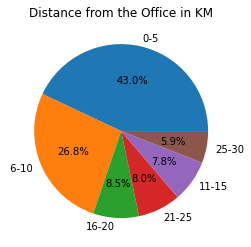

In [142]:
# Generate pie chart with percentages
ax = round(hr["distance_bin"].value_counts()/hr.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')
plt.title('Distance from the Office in KM')
ax.yaxis.set_visible(False)
plt.show()

Most of the employees live within 10 km from their workplace

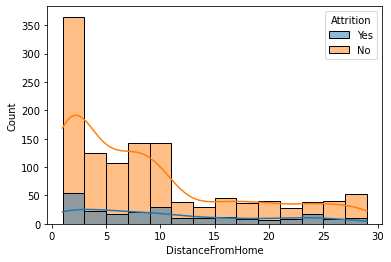

In [143]:
# Plot results
sns.histplot(hr, x="DistanceFromHome",hue="Attrition", kde=True)
plt.show()

It appears that most of the employees have a home from 1 to 10 km from the workplace. It is also imporant to note that the proportions make it appear to look like the chances of attrition may be slightly higher after 10km from the office. 

Let's do a more generalized look at some other variables and their relations to attrition.

In [144]:
# Declare a varible with certain columns
count_plot_list=['EducationField','Department','Gender','MaritalStatus', 
                 'JobRole', 'BusinessTravel','distance_bin']

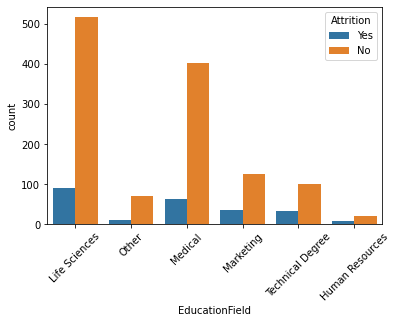

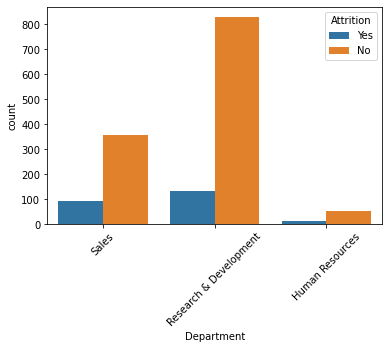

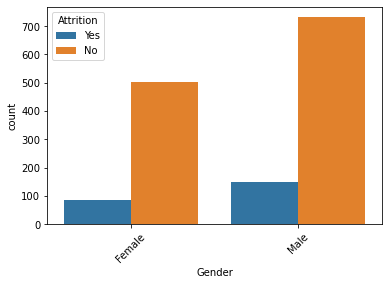

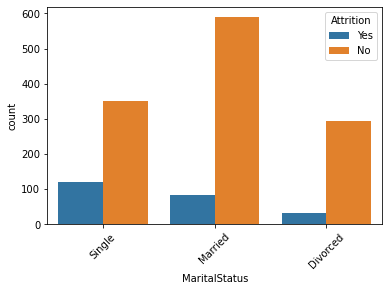

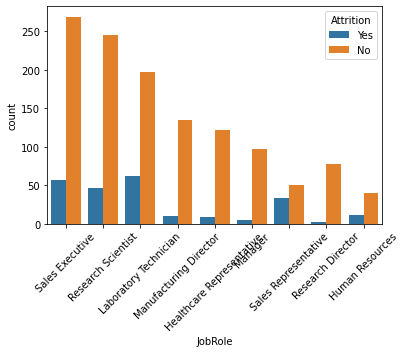

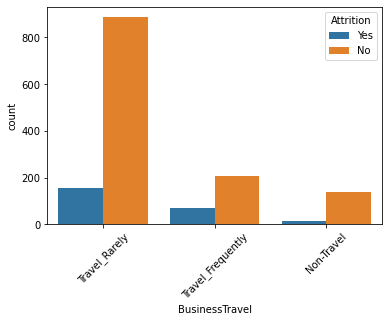

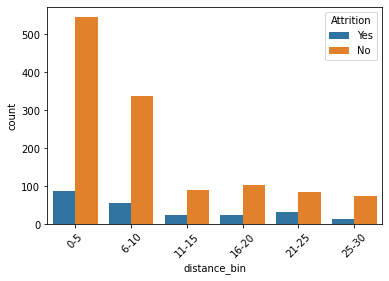

In [145]:
# Display count plots for features listed above
for i in count_plot_list:
    x = sns.countplot(x=i, hue='Attrition', data = hr)
    plt.xticks(rotation=45)
    plt.show()
    print("\n")

### Observations:
1. Most attrition appear to be in the life science department education field
2. The department with the most attrition is in the research and development. However, this department also contains the most employees. Looking at the proportions, the HR department may need to be examined further
3. Gender doesn't appear to play a substantial role in attrition
4. Single employees may be more likely to leave
5. Research Scientists have the highest attrition rate in the JobRoles. However, the managers seem to have a high turnover compared to the total amounts.



Now, let's go back to the correlations and examine some of those variables with stronger negative correlations

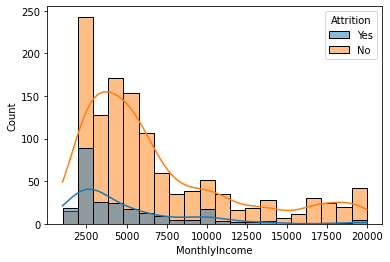

In [146]:
# Plot monthly income vs attrition
sns.histplot(hr, x="MonthlyIncome",hue="Attrition", kde=True)
plt.show()

It is shown here that as salaries increase, attrition appears to decrease. It is noted at the $100,000 mark, it appears there is a sudden increase in turnover when compared to the general trend. 

At the very low end of the salary range ($2500), there is a proportionally high turnover percentage compared to the other ranges.

In [147]:
income_by_position = hr.groupby("JobRole")['MonthlyIncome'].mean().reset_index(
    name='count')

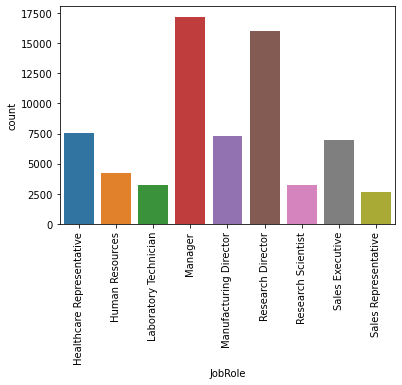

In [148]:
sns.barplot(x=income_by_position['JobRole'], y=income_by_position['count'], data=hr)
plt.xticks(rotation=90)
plt.show()

Managers and Research Directors have the highest average salaries.

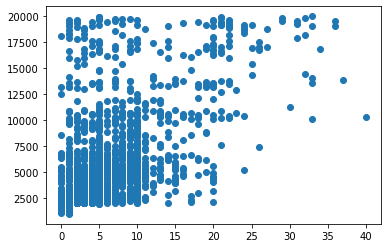

In [149]:
# Plot income based upon total years at the company
plt.scatter(hr["YearsAtCompany"], hr["MonthlyIncome"])
plt.show()

As suspected, these two features have positive linear correlation. 

Let's look at salary increases to see if they have an effect on attrition...

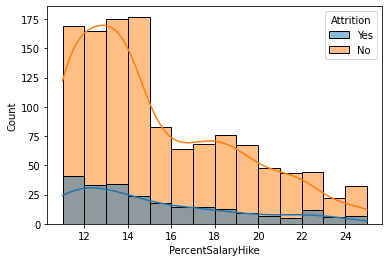

In [150]:
sns.histplot(hr, x="PercentSalaryHike",hue="Attrition", kde=True)
plt.show()

It appears like the higher the salary hike, the lower the attrition.

Let's take a look at education...

In [151]:
hr['education_bin'] = hr['Education'].replace([1,2,3,4,5],['No College','College', 'Bachelor', 
                                                           'Master', 'Doctor'])
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,distance_bin,education_bin
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,8,0,1,6,4,0,5,0-5,College
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,10,3,3,10,7,1,7,6-10,No College
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,7,3,3,0,0,0,0,0-5,College
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0,8,3,3,8,7,3,0,0-5,Master
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,1,6,3,3,2,2,2,2,0-5,No College


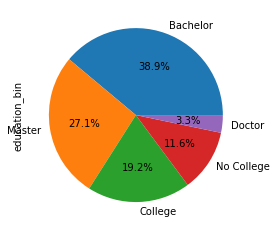

In [152]:
round(hr["education_bin"].value_counts()/hr.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')
plt.show()

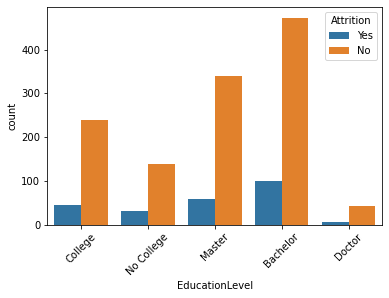

In [153]:
ax = sns.countplot(data = hr, x='education_bin', hue='Attrition')
ax.set_xlabel('EducationLevel')
plt.xticks(rotation=45)
plt.show()

More people left with bachelor's degrees, however more people have bachelors degrees than the other education levels, so that is what was suspected. It doesn't appear that education has a strong relationship with people leaving.

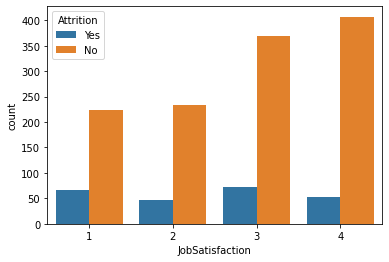

In [154]:
sns.countplot(data = hr, x='JobSatisfaction', hue='Attrition')
plt.show()

Now that we have a good idea of what the data looks like, the next step would be to start preparing the data for the model.

## Data Pre-Processing

In [155]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   object  
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   object

It is shown above that there are some column data that are still stored as objects

In [156]:
# Dropping columns created during EDA
hr.drop(['education_bin', 'distance_bin','JobRole'], axis=1, inplace=True)

Dropping the bin categories created in the EDA. Additionally, the JobRole is highly correlated with Department so dropping to avoid multicollinearity issues

In [157]:
# Replacing Attrition variable with integers 0 and 1
hr['Attrition'].replace({'No':0,'Yes':1}, inplace=True)

In [158]:
# One-hot encoding for categorical variables
hr = pd.get_dummies(data = hr, columns=['Department','BusinessTravel','EducationField',
                                        'MaritalStatus','Gender'])

In [159]:
# Print all variables and their correlation with Attrition variable
hr.corr()['Attrition'].sort_values(ascending=False)

Attrition                            1.000000
MaritalStatus_Single                 0.175419
BusinessTravel_Travel_Frequently     0.115143
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
Gender_Male                          0.029453
Department_Human Resources           0.016832
MonthlyRate                          0.015170
PerformanceRating                    0.002889
HourlyRate                          -0.006846
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Gender_Female                       -0.029453
Education                           -0.031373
EducationField_Life Sciences        -0.032703
YearsSinceLastPromotion             -0.033019
RelationshipSatisfaction            -0.045872
EducationField_Medical            

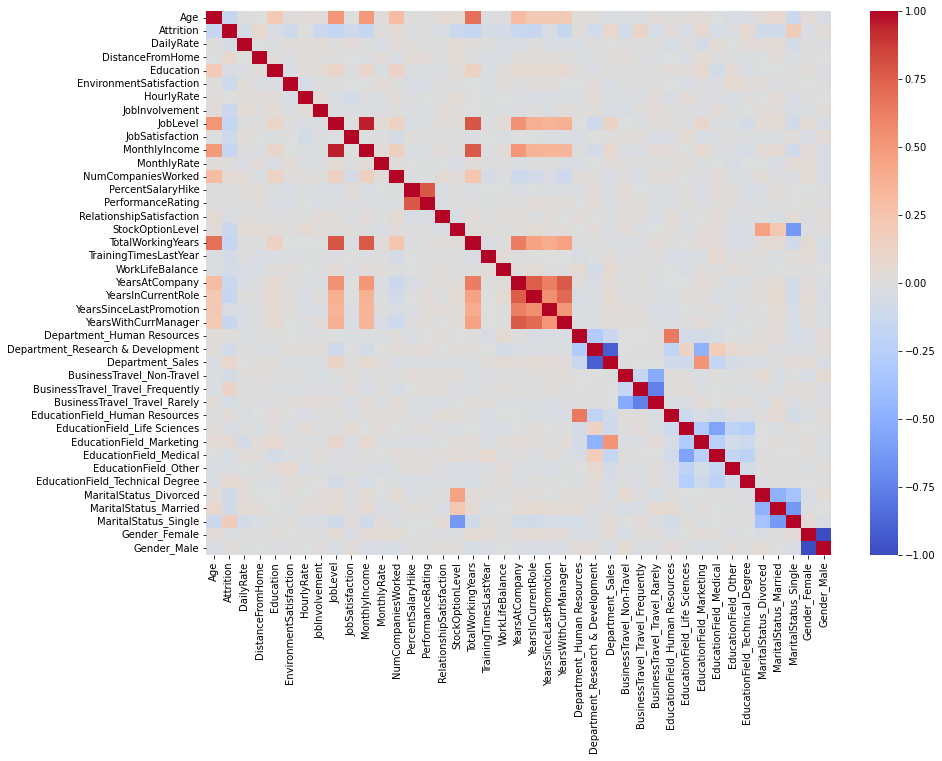

In [160]:
# Heatmap visualization
corr = hr.corr()

# plot the heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

There is a lot of multicollinearity in this heat map. This can decrease the performance of the models on future data so let's remove some of the highly correlated features. A future iteration of this analysis might include using the variance inflation factor (VIF) to help identify levels of multicollinearity in groups of variables.

In [161]:
# Check highly correlated pairs
sorted_corr = corr.unstack().sort_values()
sorted_corr.head(40)

Gender_Male                        Gender_Female                       -1.000000
Gender_Female                      Gender_Male                         -1.000000
Department_Research & Development  Department_Sales                    -0.906818
Department_Sales                   Department_Research & Development   -0.906818
BusinessTravel_Travel_Frequently   BusinessTravel_Travel_Rarely        -0.753092
BusinessTravel_Travel_Rarely       BusinessTravel_Travel_Frequently    -0.753092
StockOptionLevel                   MaritalStatus_Single                -0.638957
MaritalStatus_Single               StockOptionLevel                    -0.638957
MaritalStatus_Married              MaritalStatus_Single                -0.629981
MaritalStatus_Single               MaritalStatus_Married               -0.629981
EducationField_Life Sciences       EducationField_Medical              -0.568774
EducationField_Medical             EducationField_Life Sciences        -0.568774
BusinessTravel_Non-Travel   

In [162]:
# Dropping highly correlated features
hr.drop(['Gender_Female','Department_Research & Development','BusinessTravel_Travel_Rarely','StockOptionLevel','MaritalStatus_Married',
         'EducationField_Life Sciences','MaritalStatus_Divorced','Department_Research & Development',
         'YearsWithCurrManager','TotalWorkingYears','YearsAtCompany','JobLevel'], axis=1, inplace=True)

In [163]:
# Dropping dependent variable
features = hr.drop(['Attrition'], axis=1)

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                          for i in range(len(features.columns))]
  
print(vif_data)

                             feature        VIF
0                          DailyRate   4.815322
1                   DistanceFromHome   2.277508
2                          Education   8.308214
3            EnvironmentSatisfaction   6.568925
4                    JobSatisfaction   6.577017
5                      MonthlyIncome   3.658738
6                        MonthlyRate   4.794771
7                 NumCompaniesWorked   2.322271
8                  PercentSalaryHike  13.457303
9           RelationshipSatisfaction   6.716445
10             TrainingTimesLastYear   5.334038
11                YearsInCurrentRole   3.623756
12           YearsSinceLastPromotion   2.188715
13        Department_Human Resources   1.817653
14                  Department_Sales   2.045619
15         BusinessTravel_Non-Travel   1.156779
16  BusinessTravel_Travel_Frequently   1.272297
17    EducationField_Human Resources   1.791877
18          EducationField_Marketing   1.695831
19            EducationField_Medical   1

In [165]:
features = features.drop(['PerformanceRating','JobInvolvement','Age','HourlyRate','WorkLifeBalance'], axis=1)

In [167]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [168]:
features = variance_threshold_selector(features, 0.9)

In [169]:
# Splitting train/test to 25/75 split between test and training respectively
X_train, X_test, y_train, y_test = train_test_split(features, hr['Attrition'], stratify=hr['Attrition'],
                                                    test_size = 0.25, random_state=42)

In [172]:
# Rescaling
cols = ['JobSatisfaction','TrainingTimesLastYear',
        'EnvironmentSatisfaction',
        'PercentSalaryHike','NumCompaniesWorked','DistanceFromHome',
        'DailyRate','Education','MonthlyIncome',
        'YearsInCurrentRole','RelationshipSatisfaction','MonthlyRate',
        'YearsSinceLastPromotion']

#Creating a Scaler object
transformer = StandardScaler()

# Scaling the cols features
for i in cols:
    # Fit/Transform on train data
    X_train[i] = transformer.fit_transform(np.array(X_train[i]).reshape(-1, 1))
    # Transform only on test data
    X_test[i] = transformer.transform(np.array(X_test[i]).reshape(-1, 1)) 

There are many different ways to transform the data in order to be fitted to the models. Future iterations of this analysis may include adopting more other encoding methods such as Min-Max normalization and label/target encoding. In order to reduce data leakage, the scaling was executed after the train/test split.

In [173]:
# # If MinMaxScaler is preferred...

# # Creating a Scaler object
# transformer = MinMaxScaler()

# # Fitting the Scaler on only the training data
# transformer.fit(X_train)

# # Scaling the cols features
# for i in cols:
#     X_train[i] = transformer.fit_transform(np.array(X_train[i]).reshape(-1, 1))
#     X_test[i] = transformer.transform(np.array(X_test[i]).reshape(-1, 1))

MinMaxScaler was tested and it underperformed when compared to the StandardScaler

In [174]:
# Checking final train dataset
pd.set_option('display.max_columns',None)
X_train.head()

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion
22,-0.966810,-0.285354,1.068343,-1.577764,-0.641268,1.191983,0.943357,-1.080154,-1.151606,0.227526,1.005904,0.504116,-0.060993
74,-1.685283,-0.407522,0.097763,-0.656844,1.159183,-0.749697,1.041865,0.122604,-0.878746,-0.694289,0.203801,-1.170867,-0.680479
1339,-1.036905,-0.285354,-1.843398,1.184994,-0.641268,-0.872407,1.610131,-0.679235,2.122709,-1.616103,-0.598302,-1.170867,-0.680479
251,-0.751519,-0.896194,1.068343,0.264075,0.258958,0.963040,-1.123101,-1.080154,2.668428,1.149341,-1.400405,0.504116,2.726693
1182,0.222300,-1.018362,1.068343,1.184994,0.258958,-0.460050,0.126111,-1.080154,-0.060168,0.227526,2.610111,-0.612539,-0.370736


Now we have a dataset ready to start builiding models...Let's start with a simple decision tree

## Decision Tree Model

              precision    recall  f1-score   support

           0       0.87      0.63      0.73       309
           1       0.21      0.51      0.30        59

    accuracy                           0.61       368
   macro avg       0.54      0.57      0.51       368
weighted avg       0.76      0.61      0.66       368

The accuracy of the train set is: 0.7068965517241379
The accuracy of the test set is: 0.6114130434782609


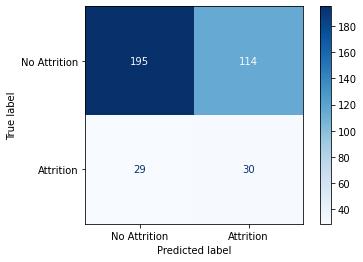

In [175]:
# Initialize DT classifier
dt = DecisionTreeClassifier(max_depth = 15, min_samples_split = 100, random_state=42, class_weight = 'balanced')

# Fit model on train data
dt.fit(X_train,y_train)

# Predict on test data
y_pred = dt.predict(X_test)

# Print classification report and train/test accuracy
print(classification_report(y_test, y_pred))
print('The accuracy of the train set is:', dt.score(X_train, y_train))
print('The accuracy of the test set is:', dt.score(X_test, y_test))

# Plot confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Attrition', 'Attrition'])
cm_display.plot(cmap=plt.cm.Blues)

On this first model, it doesn't do well with identifying individuals that stayed with the company or identifying people that left. This is a common problem with imbalanced dependent variables. 

There were many different parameters tested on the decision tree, however the settings it is currently set to seemed to perform the best. This model predicted 29 cases of attrition correctly. The advantage of decision trees is that they are very easy to explain. See the visualized tree below...

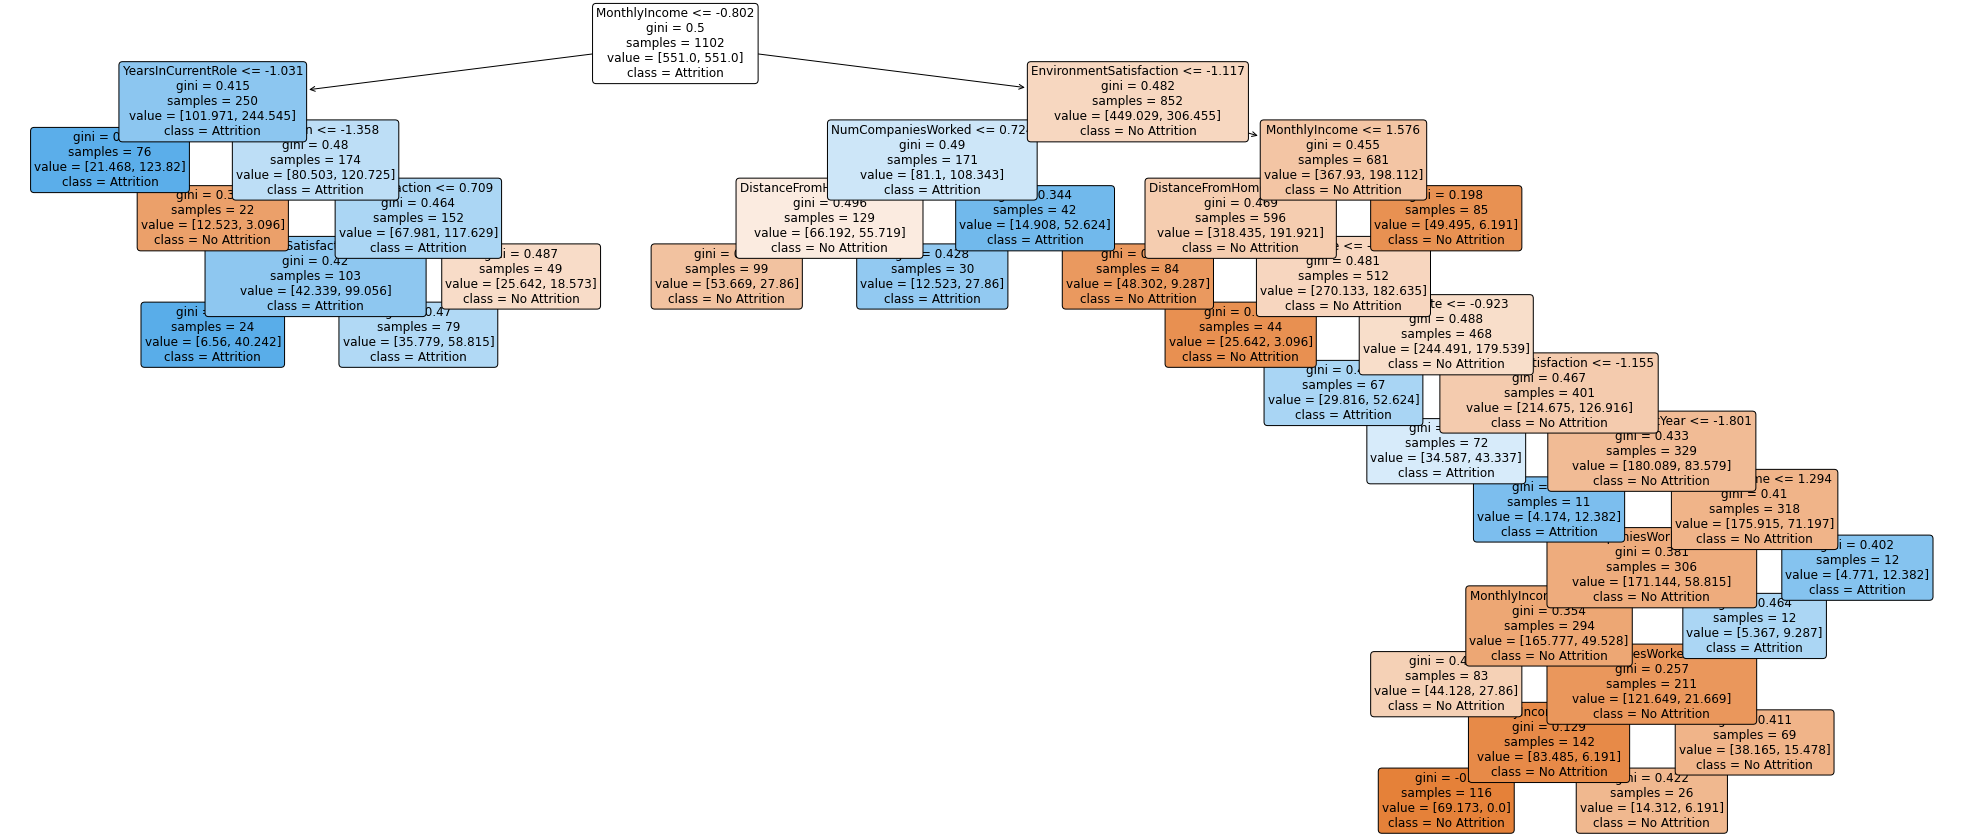

In [176]:
# Plot decision tree
from sklearn.tree import plot_tree 
plt.figure(figsize=(35,15))
plot_tree(dt, 
          fontsize=12, 
          feature_names=X_train.columns,
          class_names=['No Attrition','Attrition'],
          filled = True,
          rounded = True)
plt.show()

The visualized tree is a good tool to share with stakeholders if they have specific questions about cases that the model predicted. It lays out each decision and the parameters set for each split.

Let's create a function to help us identify feature importance in this model:

In [177]:
# Function to plot feature importance
def plot_feature_importance(importance, names, model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    feature_importance_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    feature_importance_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,10))
    
    #Plot Searborn bar chart
    sns.barplot(x=feature_importance_df['feature_importance'], y=feature_importance_df['feature_names'])
    
    #Add chart labels
    plt.title(model_type + 'Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

This function will be utilized to analyze feature importance for each of the models that have the ```feature_importance_``` attribute

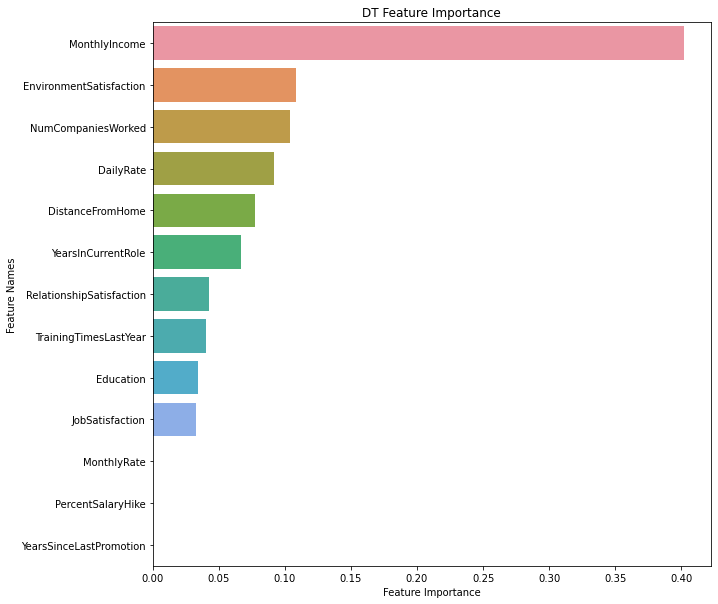

In [178]:
# Plot feature importance
plot_feature_importance(dt.feature_importances_,X_train.columns,'DT ')

As suspected during the EDA, MonthlyIncome proved to be the strongest predictor in this model followed by distance from home and age.

Since the DT did not perform well while trying to predict attrition, let's try a random forest next.

## Random Forest Models

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       309
           1       0.31      0.34      0.33        59

    accuracy                           0.77       368
   macro avg       0.59      0.60      0.59       368
weighted avg       0.78      0.77      0.78       368

The accuracy of the train set is: 0.8702359346642469
The accuracy of the test set is: 0.7744565217391305


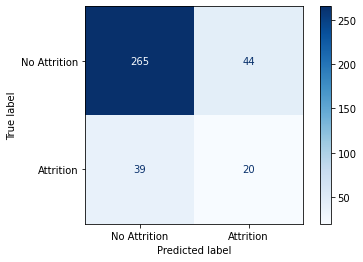

In [179]:
# Creating RF model
rf = RandomForestClassifier(n_estimators=100,criterion="gini", max_depth = 5, class_weight = 'balanced',
                           random_state=42)
# Training the forest
rf = rf.fit(X_train, y_train)

# Using the forest to make predictions on the test set
y_pred_forest = rf.predict(X_test)

# Evaluating those predictions with a confusion matrix and classification report
print(classification_report(y_test, y_pred_forest))
print('The accuracy of the train set is:', rf.score(X_train, y_train))
print('The accuracy of the test set is:', rf.score(X_test, y_test))
# Plotting CM
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_forest)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Attrition', 'Attrition'])
cm_display.plot(cmap=plt.cm.Blues)

On this first RF model, it performs well with identifying individuals that stayed with the company and a poor job identifying if people left. . Also, the test accuracy was 91% whereas the training accuracy was 80%. This could be overfitting the data.

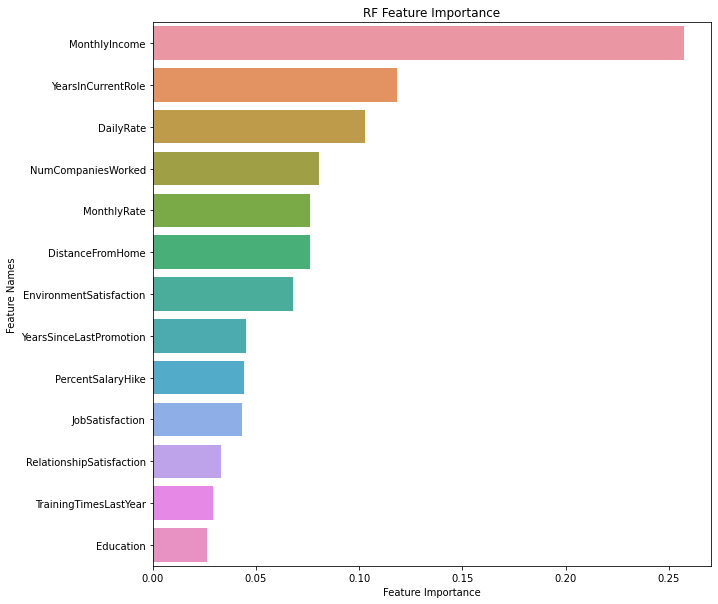

In [180]:
# Plot feature importance for first RF Model
plot_feature_importance(rf.feature_importances_,X_train.columns,'RF ')

The most important features in this model was the MonthlyIncome, Age, and Daily Rate. 

Let's try another RF model with new parameters in order to try to prevent overfitting

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       309
           1       0.29      0.44      0.35        59

    accuracy                           0.73       368
   macro avg       0.58      0.62      0.59       368
weighted avg       0.79      0.73      0.75       368

The accuracy of the train set is: 0.7776769509981851
The accuracy of the test set is: 0.7336956521739131


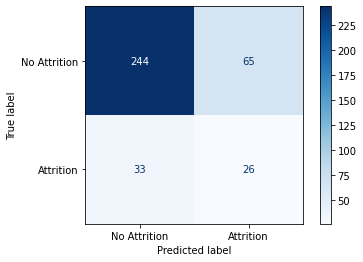

In [181]:
# Initializing RF model
rf_1 = RandomForestClassifier(n_estimators=50,criterion="entropy", max_depth = 2, random_state=42,
                             class_weight = 'balanced')
# Training the forest
rf_1 = rf_1.fit(X_train, y_train)

# Using the forest to make predictions on the test set
y_pred_forest = rf_1.predict(X_test)

# Print classification report and train/test accuracy
print(classification_report(y_test, y_pred_forest))
print('The accuracy of the train set is:', rf_1.score(X_train, y_train))
print('The accuracy of the test set is:', rf_1.score(X_test, y_test))

# Plotting confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_forest)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Attrition', 'Attrition'])
cm_display.plot(cmap=plt.cm.Blues)

This RF model performed better than the first RF model at predicting attrition. Additionally, the training/test accuracy is closer to the same which is a step in the right direction. This was done by reducing the n_estimators and max_depth criteria. Additionally, the splitting formula was changed from gini to entropy.These formulas are different ways of measuring the quality of the split. The formulas for the Gini Index (Impurity) and Entropy (Information Gain) are below:

<H5><center>$GiniIndex = 1–∑ \limits _{j}p ^2 _{j}$    &emsp;&emsp;&emsp;    $Entropy =  –∑ \limits _{j}p_j⋅log_2⋅p_j$</center></H5>

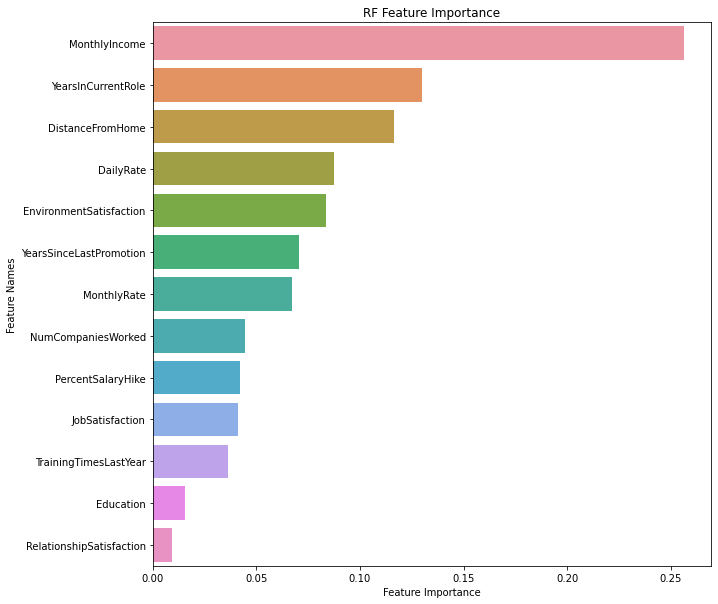

In [182]:
plot_feature_importance(rf_1.feature_importances_,X_train.columns,'RF ')

Again, monthly income was a top predictor...

Since the RF and DT did not perform well while trying to predict attrition, let's try an algorithm designed to handle class imbalance...

## RUS Boost Classifier

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       309
           1       0.29      0.51      0.37        59

    accuracy                           0.72       368
   macro avg       0.59      0.63      0.59       368
weighted avg       0.79      0.72      0.75       368

The accuracy of the train set is: 0.8112522686025408
The accuracy of the test set is: 0.717391304347826


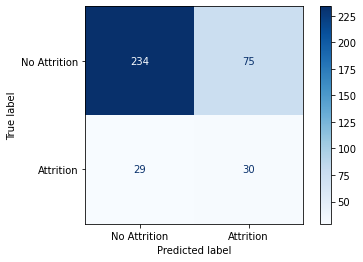

In [183]:
# Initialize model
rusboost = RUSBoostClassifier(random_state=42, n_estimators=300)
# Fit to the train data
rusboost.fit(X_train, y_train)
# Using the forest to make predictions on the test set
y_pred = rusboost.predict(X_test)

# Print classification report and train/test accuracy
print(classification_report(y_test, y_pred))
print('The accuracy of the train set is:', rusboost.score(X_train, y_train))
print('The accuracy of the test set is:', rusboost.score(X_test, y_test))

# Plot confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Attrition', 'Attrition'])
cm_display.plot(cmap=plt.cm.Blues)

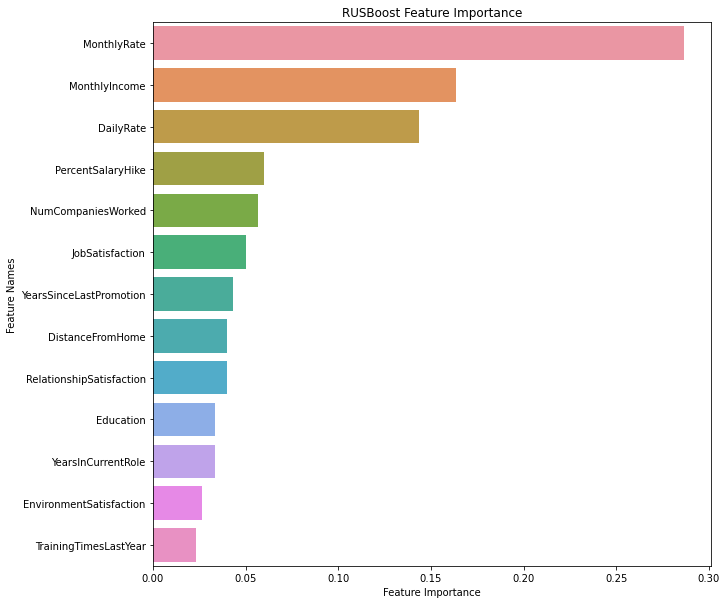

In [184]:
plot_feature_importance(rusboost.feature_importances_,X_train.columns,'RUSBoost ')

The RUSBoost algorithm did about the same as the last random forest model as it predicted  30 attrition cases in the test set. The RUSBoost algorithm uses a combination of random under-sampling and a standard boosting procedure to attempt to better predict minority classes. It did better in overall accuracy as it predicted more people that stayed correctly than the random forest model.

## XGBoost Model

[15:57:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       309
           1       0.44      0.19      0.26        59

    accuracy                           0.83       368
   macro avg       0.65      0.57      0.58       368
weighted avg       0.79      0.83      0.80       368

The accuracy of the train set is: 0.9646098003629764
The accuracy of the test set is: 0.8315217391304348


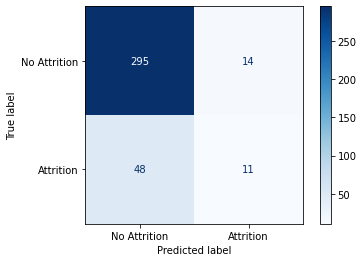

In [243]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.utils import class_weight

#class_weights = class_weight.compute_sample_weight(class_weight = 'balanced', y=y_train)

xgb_model = XGBClassifier(max_depth = 3, n_estimators = 100, random_state='42')
# Training the forest
xgb_model = xgb_model.fit(X_train, y_train)

# Using the forest to make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Print classification report and train/test accuracy
print(classification_report(y_test, y_pred))
print('The accuracy of the train set is:', xgb_model.score(X_train, y_train))
print('The accuracy of the test set is:', xgb_model.score(X_test, y_test))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Attrition', 'Attrition'])
cm_display.plot(cmap=plt.cm.Blues)

The XGBoost algorithm is a gradient boosted tree algorithm. It performed simliarly to the other models. This model may be overfitting because of big difference in the test and train accuracy.

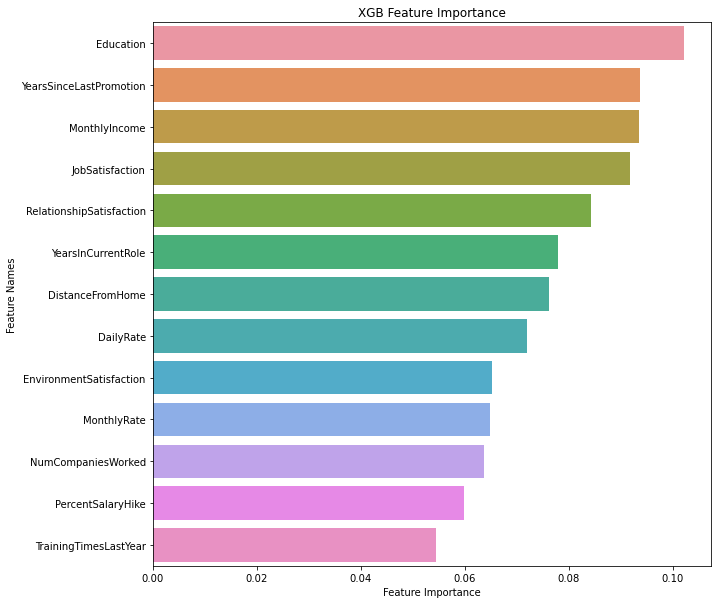

In [186]:
plot_feature_importance(xgb_model.feature_importances_,X_train.columns,'XGB ')

The XGBoost algorithm did a bit better than the RUSBoost model at predicting the minority class, but it performed much worse at predicting people that stayed...Let's try logistic regression next to see if there are any improvements with that model.

## Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.63      0.74       309
           1       0.24      0.59      0.34        59

    accuracy                           0.63       368
   macro avg       0.56      0.61      0.54       368
weighted avg       0.79      0.63      0.68       368

The accuracy of the train set is: 0.6642468239564429
The accuracy of the test set is: 0.6277173913043478


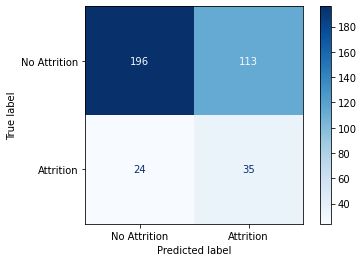

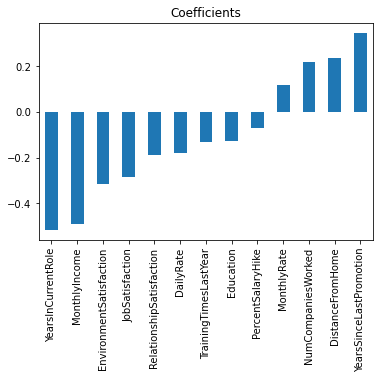

In [187]:
# Create log model
log_model = LogisticRegression(C=0.111, class_weight='balanced', max_iter=1000, random_state=42, solver='liblinear')
log_model.fit(X_train, y_train)

# Predict
y_pred = log_model.predict(X_test)

# Print classification report and train/test accuracy
print(classification_report(y_test, y_pred))
print('The accuracy of the train set is:', log_model.score(X_train, y_train))
print('The accuracy of the test set is:', log_model.score(X_test, y_test))

# Calculate Confusion Matrix
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

class_labels=['No Attrition','Attrition']

# Visualize Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                            display_labels=class_labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()
# Create a graph of the coefficients
predictor_names = features.columns
coefficients = log_model.coef_.ravel()
coef = pd.Series(coefficients,predictor_names).sort_values()
coef.plot(kind='bar', title = 'Coefficients')
plt.show()

If the sole goal is to predict individuals that left the job, logistic regression performed the best on the test dataset as it correctly identified 36 people that left the job (more than any other model).

## SVM

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       309
           1       0.25      0.51      0.34        59

    accuracy                           0.68       368
   macro avg       0.57      0.61      0.56       368
weighted avg       0.78      0.68      0.72       368

The accuracy of the train set is: 0.8139745916515426
The accuracy of the test set is: 0.6820652173913043


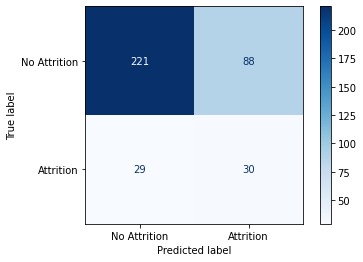

In [188]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', class_weight='balanced', probability=True)
svclassifier.fit(X_train, y_train)

# Predict
y_pred = svclassifier.predict(X_test)

# Print classification report and train/test accuracy
print(classification_report(y_test, y_pred))
print('The accuracy of the train set is:', svclassifier.score(X_train, y_train))
print('The accuracy of the test set is:', svclassifier.score(X_test, y_test))

# Calculate Confusion Matrix
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

class_labels=['No Attrition','Attrition']

# Visualize Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                            display_labels=class_labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()


No significant improvement with SVM model...

## Neural Network

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       309
           1       0.49      0.31      0.38        59

    accuracy                           0.84       368
   macro avg       0.68      0.62      0.64       368
weighted avg       0.81      0.84      0.82       368

The accuracy of the train set is: 0.9019963702359347
The accuracy of the test set is: 0.8369565217391305


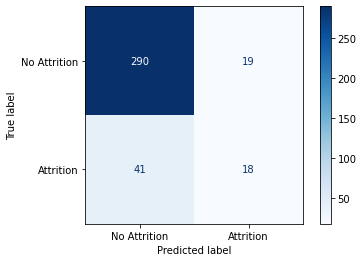

In [218]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42,hidden_layer_sizes=(13,13,13,13), activation='relu', solver='adam', max_iter=200, 
                    learning_rate='constant')
mlp.fit(X_train,y_train)

# Predict
y_pred = mlp.predict(X_test)

# Print classification report and train/test accuracy
print(classification_report(y_test, y_pred))
print('The accuracy of the train set is:', mlp.score(X_train, y_train))
print('The accuracy of the test set is:', mlp.score(X_test, y_test))

# Calculate Confusion Matrix
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

class_labels=['No Attrition','Attrition']

# Visualize Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                            display_labels=class_labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()


MLP Classifier stands for Multi-layer Perceptron Classifier. This model depends on an underlying Neural Network to perform classification. There is no significant improvement with this MLP classifier at predicting attrition although the overall accuracy of the NN is higher than any other model.

Now that we have built all the models and analyzed the confusion matrix and metric scores for the test sets, let's validate the scores against the test and training sets in order to help determine if there is overfitting.

In [219]:
# Defining lists
models = [dt, rf, rf_1, log_model, xgb_model, rusboost, svclassifier, mlp]
names = ['DT', "RF", "RF1", "LogReg",'XGBoost','RUSBoost','SVM','NN']

# Creating empty list for loop to populate
df_list = []
for name, model in zip(names, models):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # accuracy
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    # precision
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    # recall
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    # f1
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    # rocauc
    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
 
    df = pd.DataFrame(np.array([train_accuracy, train_precision, train_recall, train_f1, train_auc,
                                test_accuracy, test_precision, test_recall, test_f1, test_auc]).reshape(2, -1),
                      index=['train', 'test'], columns=['Accuracy', 'Precision', 'Recall', 'F1-Score','AUC'])
    df_list.append(df)

final = pd.concat(df_list, axis=0, keys=names)
final

Accuracy  Precision    Recall  F1-Score       AUC
DT       train  0.706897   0.329412  0.786517  0.464345  0.739038
         test   0.611413   0.208333  0.508475  0.295567  0.569771
RF       train  0.870236   0.581395  0.702247  0.636132  0.802422
         test   0.774457   0.312500  0.338983  0.325203  0.598294
RF1      train  0.777677   0.380783  0.601124  0.466231  0.706406
         test   0.733696   0.285714  0.440678  0.346667  0.615161
LogReg   train  0.664247   0.285714  0.719101  0.408946  0.686390
         test   0.627717   0.236486  0.593220  0.338164  0.613762
XGBoost  train  0.758621   0.400901  1.000000  0.572347  0.856061
         test   0.595109   0.228916  0.644068  0.337778  0.614914
RUSBoost train  0.811252   0.451299  0.780899  0.572016  0.798999
         test   0.717391   0.285714  0.508475  0.365854  0.632878
SVM      train  0.813975   0.461972  0.921348  0.615385  0.857319
         test   0.682065   0.254237  0.508475  0.338983  0.611842
NN       train  0.901996   0.786885  0.539326  0.640000  0.755594
         test   0.836957   0.486486  0.305085  0.375000  0.621798

It appears that some of the models are overfitting the data as they performed well on the training set but didn't have comparable scores on the test sets. 75%-80% accuracy on the test set isn't a bad score, however the overfitting could cause  problems with new data. Since the goal is to correctly predict attrition, the logistic regression model may be preferred as it predicted the most individuals that left the job correctly on the testing set. The 2nd random forest model also performed well on predicting Attrition. 

All of the scores are beneficial to evaluate, however, in this case the AUC score is an important metric as it informs as to model performance in regards to distinguishing between the 2 classes. On the test sets, logistic regression and the SVM had the best AUC scores.

This is one of the cases where it is helpful to analyze the confusion matrix as the scores can be misleading. At first glance on the above chart, it appears like the Logistic Regression model performed as one of the worst out of all the models that were trained. However, for this use case, it may be recommended model for deployment as logistic regression is a simple model to explain and it correctly identified attrition better than any other model. If performance is preferred, the RUSBoost model or Random Forest might be the recommendation although they may be overfitting the data slightly.

There are many different methods for dealing with class imbalance. One of those techinques is SMOTE. This stands for synthetic minority oversampling technique. It attempts to solve the imbalance problem by radomly increasing minority class data points by replicating them. 

# SMOTE Oversampling

In [220]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42)
X_over,y_over= smote.fit_resample(X_train,y_train)

In [221]:
X_train.shape

(1102, 13)

In [222]:
X_over.shape

(1848, 13)

In [223]:
log_model1 = LogisticRegression(C=0.111,max_iter=1000, random_state=42, class_weight='balanced', solver='liblinear')
log_model1.fit(X_over, y_over)

LogisticRegression(C=0.111, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [224]:
rusboost1 = RUSBoostClassifier(random_state=42, n_estimators=300)
rusboost1.fit(X_over,y_over)

RUSBoostClassifier(n_estimators=300, random_state=42)

In [225]:
# Defining lists
models = [log_model1, log_model, rusboost1, rusboost]
names = ['SMOTE Log Model', 'Original Log Model','Smote RUSBoost', 'Original RUSBoost']

# Creating empty list for loop to populate
df_list = []
for name, model in zip(names, models):
    y_train_pred = model.predict(X_over)
    y_test_pred = model.predict(X_test)

    # accuracy
    train_accuracy = model.score(X_over, y_over)
    test_accuracy = model.score(X_test, y_test)
    # precision
    train_precision = precision_score(y_over, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    # recall
    train_recall = recall_score(y_over, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    # f1
    train_f1 = f1_score(y_over, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    #rocauc
    train_auc = roc_auc_score(y_over, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
 
    df = pd.DataFrame(np.array([train_accuracy, train_precision, train_recall, train_f1, train_auc,
                                test_accuracy, test_precision, test_recall, test_f1, test_auc]).reshape(2, -1),
                      index=['train', 'test'], columns=['Accuracy', 'Precision', 'Recall', 'F1-Score','AUC'])
    df_list.append(df)

finalsmote = pd.concat(df_list, axis=0, keys=names)
finalsmote

Accuracy  Precision    Recall  F1-Score       AUC
SMOTE Log Model    train  0.700758   0.685686  0.741342  0.712428  0.700758
                   test   0.625000   0.238411  0.610169  0.342857  0.619001
Original Log Model train  0.697511   0.681592  0.741342  0.710213  0.697511
                   test   0.627717   0.236486  0.593220  0.338164  0.613762
Smote RUSBoost     train  0.922078   0.949309  0.891775  0.919643  0.922078
                   test   0.801630   0.333333  0.237288  0.277228  0.573337
Original RUSBoost  train  0.675866   0.745098  0.534632  0.622558  0.675866
                   test   0.717391   0.285714  0.508475  0.365854  0.632878

Here, it is shown that using the SMOTE technique did improve the RUSBoost model accuracy. However, it looks like the AUC score on the test set decreased indicating that it may not be differentiating between the classes as well as the original model. Let's check the confusion matrix for the logistic regression and rusboost models after the oversampling was completed on the train set.

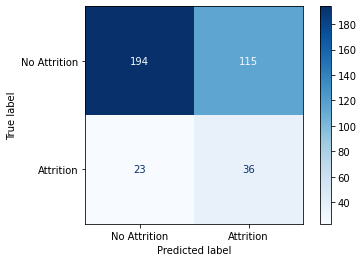

In [226]:
# Predict
y_pred = log_model1.predict(X_test)

# Calculate Confusion Matrix
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
class_labels=['No Attrition','Attrition']

# Visualize Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                            display_labels=class_labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

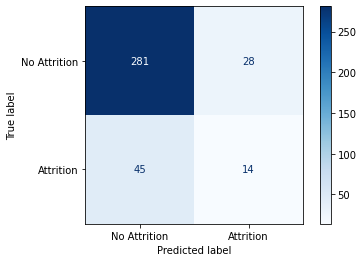

In [227]:
# Using the forest to make predictions on the test set
y_pred = rusboost1.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Attrition', 'Attrition'])
cm_display.plot(cmap=plt.cm.Blues)

There are some trade-offs here as it decreased the amount of correct predictions for the minority class but only slightly. It increased the amount of correct predictions for indidivudals that did not leave the job significantly which is why the scores increased.

Some of the limitations of these findings are that this dataset only consists of 1470 employees. A greater sample size could be beneficial to help improve the model. Multiple train/test splits were attempted along with different parameter and features for each of the models. Most failed to improve the model significantly. Improvements to the predictions could be made by trying other models or perhaps using some more under/oversampling techniques. Additionally, the utilization of a library like HyperOpt or GridSearchCV might be used for optimization of the models. Finally, other forms of feature encoding/selection measures might be implemented. 